In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
# Veri Setini okuma
data = pd.read_csv("Groceries_dataset.csv")

In [4]:
# verinin ilk bakış
data.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [5]:
# Boyut bilgisi veri setimiz 38765 satır ve 3 sütundan oluşmaktadır
data.shape

(38765, 3)

In [6]:
# veri seti hakkında bilgiler
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [7]:
# Veri setinde eksik gözlem olup olmadıgını kontrol etme -> Hiç eksik gözlem yokmuş
data.isnull().values.any()

False

In [8]:
# Veri setine yeni sutun ekleme
data["Date"] = data["Date"].apply(pd.to_datetime)
data["day"] = data.Date.dt.dayofweek 
data["weekday"] = np.where(data["day"].isin([6,7]), 1,0)

yukarıdaki işlemde Date sutunun tipini datetime çevirdik ve daha sonra veri setinde iki tane sutun ekledik.Birinci sütun day sütunu ikincisi ise günün haftaiçi veya haftasonuna denk geldiğini bulan sutun.

In [9]:
data.head()

,Member_number,Date,itemDescription,day,weekday
0,1808,2015-07-21,tropical fruit,1,0
1,2552,2015-05-01,whole milk,4,0
2,2300,2015-09-19,pip fruit,5,0
3,1187,2015-12-12,other vegetables,5,0
4,3037,2015-01-02,whole milk,4,0


# Visualization

In [10]:
# Haftaiçi ve haftasonu satış miktarları
data.groupby(["weekday"])["itemDescription"].agg(["count"])

,count
weekday,
0,33141
1,5624


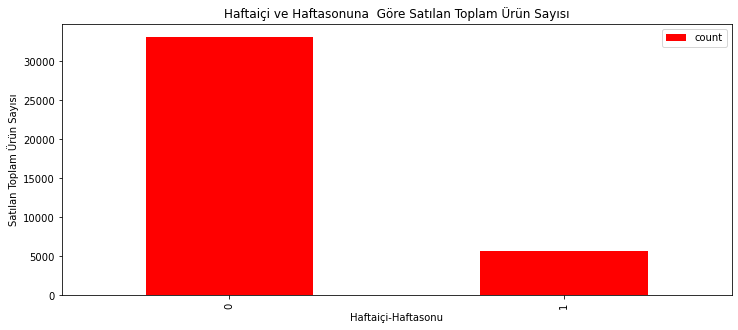

In [11]:
# Haftaiçi ve Haftasonuna göre yapılan satışların toplamı
data.groupby(["weekday"])["itemDescription"].agg(["count"]).plot(figsize=(12,5),kind = "bar",color = "red")
plt.title("Haftaiçi ve Haftasonuna  Göre Satılan Toplam Ürün Sayısı")
plt.xlabel("Haftaiçi-Haftasonu")
plt.ylabel("Satılan Toplam Ürün Sayısı")
plt.show()

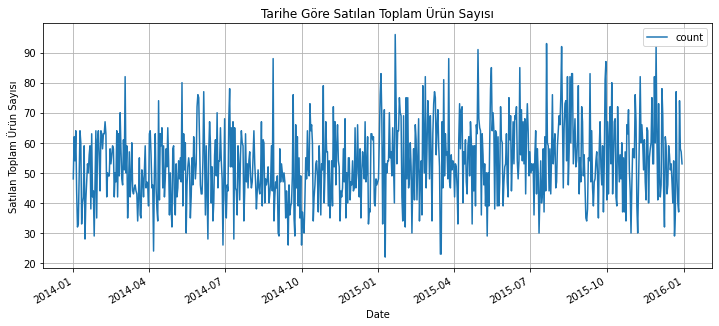

In [12]:
# Tarihe Göre Satılan Toplam Ürün sayısı
data.groupby(["Date"])["itemDescription"].agg(["count"]).plot(figsize=(12,5),grid = True)
plt.title("Tarihe Göre Satılan Toplam Ürün Sayısı")
plt.xlabel("Date")
plt.ylabel("Satılan Toplam Ürün Sayısı")
plt.show()

In [13]:
len(data["Member_number"].unique())

3898

In [14]:
# veri setinde toplamda 167 çeşit ürün var
len(data["itemDescription"].unique())

167

In [15]:
# Veri setimizde her bir ürünün frekansı 
data["itemDescription"].value_counts()

whole milk               2502
other vegetables         1898
rolls/buns               1716
soda                     1514
yogurt                   1334
                         ... 
make up remover             5
bags                        4
baby cosmetics              3
preservation products       1
kitchen utensil             1
Name: itemDescription, Length: 167, dtype: int64

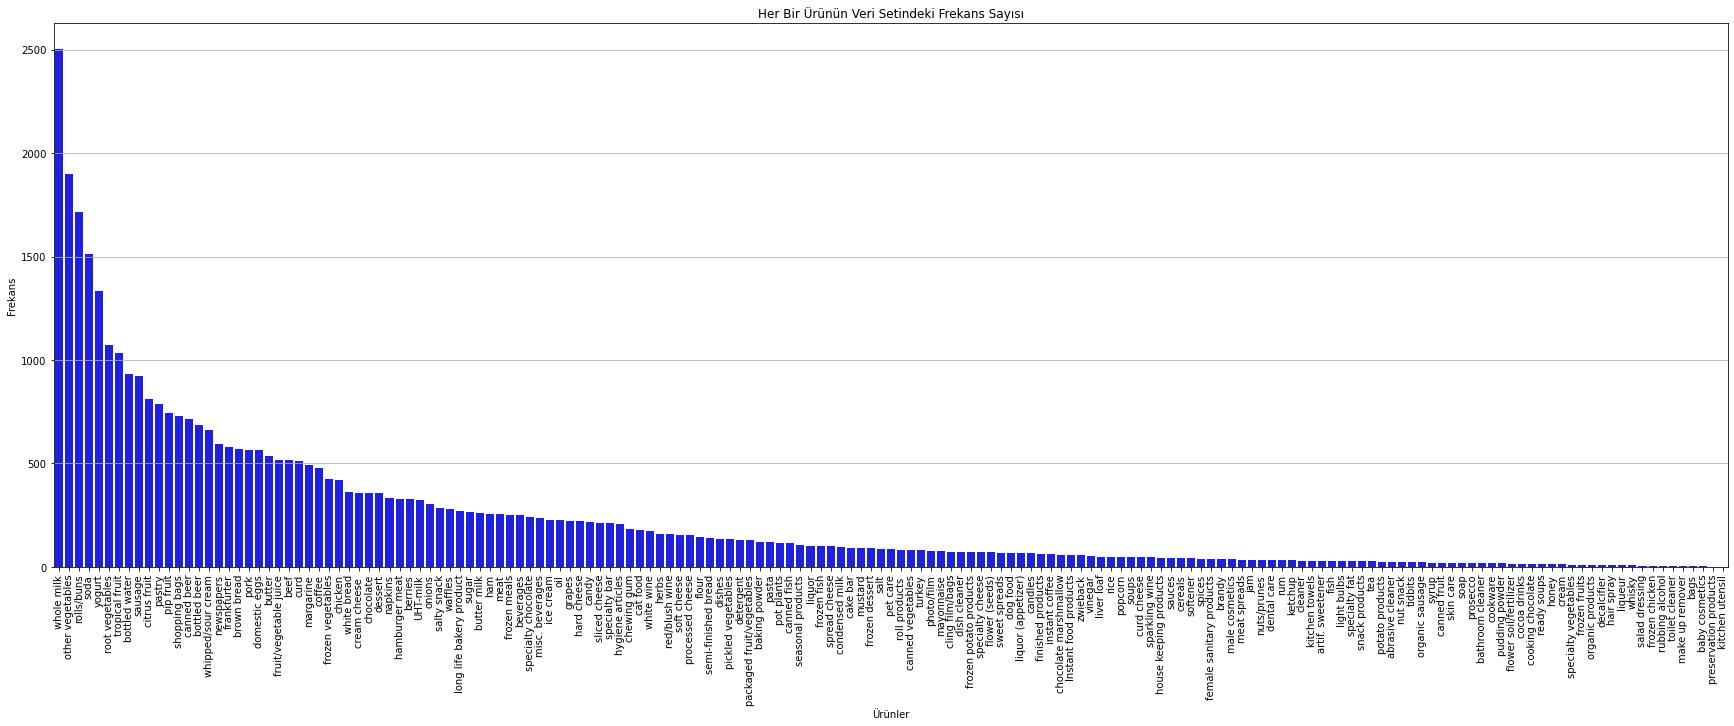

In [16]:
# Ürünlerin Frekansları
plt.figure(figsize = (30,10))
plt.grid()
sns.barplot(x = data.itemDescription.value_counts().keys(),y = data.itemDescription.value_counts().values,color="Blue")
plt.title("Her Bir Ürünün Veri Setindeki Frekans Sayısı")
plt.xlabel("Ürünler")
plt.ylabel("Frekans")
plt.xticks(rotation=90)
plt.show()

In [17]:
# 728 benzersiz tarih var veri setimizde
len(data.Date.unique())

728

# Apriori

In [18]:
df=data.groupby(['Member_number','Date'])['itemDescription'].apply(sum)
df

Member_number  Date      
1000           2014-06-24                   whole milkpastrysalty snack
               2015-03-15    sausagewhole milksemi-finished breadyogurt
               2015-05-27                        sodapickled vegetables
               2015-07-24                    canned beermisc. beverages
               2015-11-25                       sausagehygiene articles
                                                ...                    
4999           2015-05-16                 butter milkwhipped/sour cream
               2015-12-26                            bottled waterherbs
5000           2014-09-03                   fruit/vegetable juiceonions
               2014-11-16                  bottled beerother vegetables
               2015-10-02        sodaroot vegetablessemi-finished bread
Name: itemDescription, Length: 14963, dtype: object

In [19]:
transactions = [a[1]['itemDescription'].tolist() for a in list(data.groupby(['Member_number','Date']))]
transactions

[['whole milk', 'pastry', 'salty snack'],
 ['sausage', 'whole milk', 'semi-finished bread', 'yogurt'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['sausage', 'whole milk', 'rolls/buns'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['butter', 'whole milk'],
 ['frozen vegetables', 'other vegetables'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns', 'rolls/buns'],
 ['root vegetables', 'detergent'],
 ['sausage', 'rolls/buns'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['pip fruit', 'whole milk', 'tropical fruit'],
 ['root vegetables', 'whole milk', 'pastry'],
 ['rolls/buns', 'red/blush wine', 'chocolate'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'chocolate', 'packaged fruit/vegetables', 'rolls/buns'],
 ['other vegetables', 'hygiene

In [20]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transactions = pd.DataFrame(te_ary, columns=te.columns_)

In [21]:
transactions

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
14959,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14960,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
14961,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [23]:
apriori_items = apriori(transactions, min_support=0.001, use_colnames=True, verbose=1)
a = apriori_items.sort_values("support",ascending = False)
a.head(20)

Processing 28 combinations | Sampling itemset size 4e 3


,support,itemsets
146,0.157923,(whole milk)
90,0.122101,(other vegetables)
109,0.110005,(rolls/buns)
123,0.097106,(soda)
147,0.085879,(yogurt)
110,0.069572,(root vegetables)
139,0.067767,(tropical fruit)
10,0.060683,(bottled water)
115,0.060349,(sausage)
28,0.053131,(citrus fruit)


In [24]:
rules = association_rules(apriori_items, metric="confidence", min_threshold=0.001)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(bottled water),(UHT-milk),0.060683,0.021386,0.001069,0.017621,0.823954,-0.000228,0.996168
1,(UHT-milk),(bottled water),0.021386,0.060683,0.001069,0.050000,0.823954,-0.000228,0.988755
2,(other vegetables),(UHT-milk),0.122101,0.021386,0.002139,0.017515,0.818993,-0.000473,0.996060
3,(UHT-milk),(other vegetables),0.021386,0.122101,0.002139,0.100000,0.818993,-0.000473,0.975443
4,(rolls/buns),(UHT-milk),0.110005,0.021386,0.001804,0.016403,0.767013,-0.000548,0.994934


In [25]:
rules.sort_values('confidence', ascending = False, inplace=True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1232,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1208,"(rolls/buns, sausage)",(whole milk),0.005347,0.157923,0.001136,0.212500,1.345594,0.000292,1.069304
1226,"(soda, sausage)",(whole milk),0.005948,0.157923,0.001069,0.179775,1.138374,0.000130,1.026642
1108,(semi-finished bread),(whole milk),0.009490,0.157923,0.001671,0.176056,1.114825,0.000172,1.022008
1220,"(yogurt, rolls/buns)",(whole milk),0.007819,0.157923,0.001337,0.170940,1.082428,0.000102,1.015701
1234,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
584,(detergent),(whole milk),0.008621,0.157923,0.001403,0.162791,1.030824,0.000042,1.005814
729,(ham),(whole milk),0.017109,0.157923,0.002740,0.160156,1.014142,0.000038,1.002659
148,(bottled beer),(whole milk),0.045312,0.157923,0.007151,0.157817,0.999330,-0.000005,0.999874
654,(frozen fish),(whole milk),0.006817,0.157923,0.001069,0.156863,0.993287,-0.000007,0.998743


In [26]:
rules.sort_values('lift', ascending = False, inplace=True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1236,(sausage),"(yogurt, whole milk)",0.060349,0.011161,0.001470,0.024363,2.182917,0.000797,1.013532
1233,"(yogurt, whole milk)",(sausage),0.011161,0.060349,0.001470,0.131737,2.182917,0.000797,1.082219
1234,"(sausage, whole milk)",(yogurt),0.008955,0.085879,0.001470,0.164179,1.911760,0.000701,1.093681
1235,(yogurt),"(sausage, whole milk)",0.085879,0.008955,0.001470,0.017121,1.911760,0.000701,1.008307
475,(citrus fruit),(specialty chocolate),0.053131,0.015973,0.001403,0.026415,1.653762,0.000555,1.010726
474,(specialty chocolate),(citrus fruit),0.015973,0.053131,0.001403,0.087866,1.653762,0.000555,1.038081
1232,"(yogurt, sausage)",(whole milk),0.005748,0.157923,0.001470,0.255814,1.619866,0.000563,1.131541
1237,(whole milk),"(yogurt, sausage)",0.157923,0.005748,0.001470,0.009310,1.619866,0.000563,1.003596
618,(tropical fruit),(flour),0.067767,0.009757,0.001069,0.015779,1.617141,0.000408,1.006118
619,(flour),(tropical fruit),0.009757,0.067767,0.001069,0.109589,1.617141,0.000408,1.046969


In [27]:
rules.sort_values('support', ascending = False, inplace=True)
rules.head(20)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
952,(other vegetables),(whole milk),0.122101,0.157923,0.014837,0.121511,0.769430,-0.004446,0.958551
953,(whole milk),(other vegetables),0.157923,0.122101,0.014837,0.093948,0.769430,-0.004446,0.968928
1057,(whole milk),(rolls/buns),0.157923,0.110005,0.013968,0.088447,0.804028,-0.003404,0.976350
1056,(rolls/buns),(whole milk),0.110005,0.157923,0.013968,0.126974,0.804028,-0.003404,0.964550
1137,(whole milk),(soda),0.157923,0.097106,0.011629,0.073635,0.758296,-0.003707,0.974663
1136,(soda),(whole milk),0.097106,0.157923,0.011629,0.119752,0.758296,-0.003707,0.956636
1182,(yogurt),(whole milk),0.085879,0.157923,0.011161,0.129961,0.822940,-0.002401,0.967861
1183,(whole milk),(yogurt),0.157923,0.085879,0.011161,0.070673,0.822940,-0.002401,0.983638
921,(rolls/buns),(other vegetables),0.110005,0.122101,0.010559,0.095990,0.786154,-0.002872,0.971117
920,(other vegetables),(rolls/buns),0.122101,0.110005,0.010559,0.086481,0.786154,-0.002872,0.974249
